<H1> MULTIPLE LINEAR REGRESSION

In [1]:
house <- read.csv("C:/Users/LENOVO/Desktop/sem II/R/ds/kc_house_data.csv/kc_house_data.csv")

In [2]:
head(house)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.66,-122.01,4760,101930


In [3]:
summary(house)

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321962   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
 NA's   :1           (Other)        :20834                     NA's   :1       
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

In [4]:
str(house)

'data.frame':	21614 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 373 levels "","20140502T000000",..: 166 222 292 222 285 12 58 253 341 307 ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : num  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : num  1180 2570 770 1960 1680 ...
 $ sqft_lot     : num  5650 7242 10000 5000 8080 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : num  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : num  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : num  1180 2170 770 1050 1680 ...
 $ sqft_basement: num  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : num  1955 1951 1933 1965 1987 ...
 $ yr_renovated : num  0 1991 0 0 0 ...
 $ zipcode      : num  98178 98125 98028 98136 98074 ...
 $ lat         

In [5]:
any(is.na(house))

[1] TRUE

In [6]:
house[is.na(house)]=0

In [8]:
library(ggplot2)
library(ggthemes)
library(dplyr)

In [9]:
num.cols=sapply(house, is.numeric)
num.cols

id          date         price      bedrooms     bathrooms 
         TRUE         FALSE          TRUE          TRUE          TRUE 
  sqft_living      sqft_lot        floors    waterfront          view 
         TRUE          TRUE          TRUE          TRUE          TRUE 
    condition         grade    sqft_above sqft_basement      yr_built 
         TRUE          TRUE          TRUE          TRUE          TRUE 
 yr_renovated       zipcode           lat          long sqft_living15 
         TRUE          TRUE          TRUE          TRUE          TRUE 
   sqft_lot15 
         TRUE

In [12]:
cor.data=cor(house[,num.cols])
cor.data
round(cor.data,2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000000,-0.016761214,0.001552727,0.005361276,-0.0120887835,-0.132073679,0.018724687,-0.002714512,0.011614185,-0.023380399,0.008601408,-0.010681248,-0.005102249,0.02394574,-0.016890470,0.0101380930,0.009285515,-0.007206354,-0.002686790,-0.138754574
price,-0.016761214,1.000000000,0.308255938,0.525045932,0.7019517788,0.089660585,0.256748406,0.266369387,0.397292629,0.036338720,0.666780053,0.605501968,0.323812771,0.04913531,0.126433664,-0.0042532747,0.120884616,0.003648448,0.585265170,0.082446735
bedrooms,0.001552727,0.308255938,1.000000000,0.516097245,0.5768067409,0.031754658,0.175808417,-0.006565865,0.079558779,0.029323159,0.357599446,0.477765590,0.303108689,0.15044951,0.018870306,0.0123652892,0.019197906,-0.002721716,0.391928296,0.029313588
bathrooms,0.005361276,0.525045932,0.516097245,1.000000000,0.7547318022,0.087770420,0.500828664,0.063743575,0.187742718,-0.124215765,0.665041506,0.685423341,0.283801368,0.46800922,0.050756769,0.0023193961,0.026812204,0.018840532,0.568792769,0.087219119
sqft_living,-0.012088784,0.701951779,0.576806741,0.754731802,1.0000000000,0.172842840,0.354134493,0.103814617,0.284608843,-0.058159791,0.762548286,0.876624294,0.435056009,0.29569603,0.055378317,-0.0005885601,0.034838429,0.024944175,0.756487184,0.183311875
sqft_lot,-0.132073679,0.089660585,0.031754658,0.087770420,0.1728428396,1.000000000,-0.005153364,0.021605084,0.074714874,-0.008864181,0.113619221,0.183528359,0.015297116,0.04931818,0.007647020,-0.0078858100,-0.031473655,0.035891578,0.144628534,0.718558797
floors,0.018724687,0.256748406,0.175808417,0.500828664,0.3541344929,-0.005153364,1.000000000,0.023705278,0.029477683,-0.262883629,0.458485414,0.524011855,-0.245574240,0.45287886,0.006364171,0.0140342961,0.036754777,0.002334268,0.280152296,-0.011207269
waterfront,-0.002714512,0.266369387,-0.006565865,0.063743575,0.1038146171,0.021605084,0.023705278,1.000000000,0.401857644,0.016663707,0.082720012,0.072075513,0.080589773,-0.02355303,0.092885573,0.0030121411,-0.005067565,-0.007584223,0.086458010,0.030705008
view,0.011614185,0.397292629,0.079558779,0.187742718,0.2846088427,0.074714874,0.029477683,0.401857644,1.000000000,0.046034531,0.251165763,0.167661444,0.276952518,-0.04775158,0.103919930,0.0088545241,0.004291851,-0.015130764,0.280424984,0.072580659
condition,-0.023380399,0.036338720,0.029323159,-0.124215765,-0.0581597912,-0.008864181,-0.262883629,0.016663707,0.046034531,1.000000000,-0.142863649,-0.157573041,0.174152276,-0.31379046,-0.060528362,0.0357432257,0.026875217,-0.052850080,-0.092045319,-0.003290056


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,0.01,0.01,-0.01,0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,0.00,0.12,0.00,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,0.01,0.02,0.00,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.67,0.69,0.28,0.47,0.05,0.00,0.03,0.02,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.30,0.06,0.00,0.03,0.02,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.01,-0.03,0.04,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.45,0.01,0.01,0.04,0.00,0.28,-0.01
waterfront,0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.02,0.09,0.00,-0.01,-0.01,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.01,0.00,-0.02,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.31,-0.06,0.04,0.03,-0.05,-0.09,0.00


In [14]:
library(corrplot)
library(corrgram)

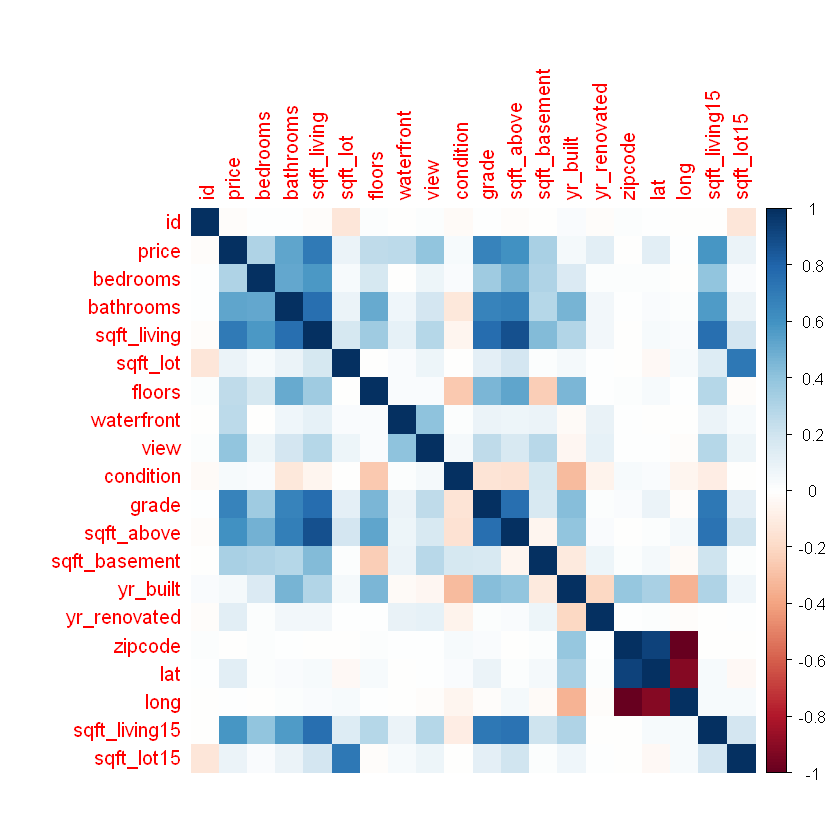

In [15]:
corrplot(cor.data,method='color')

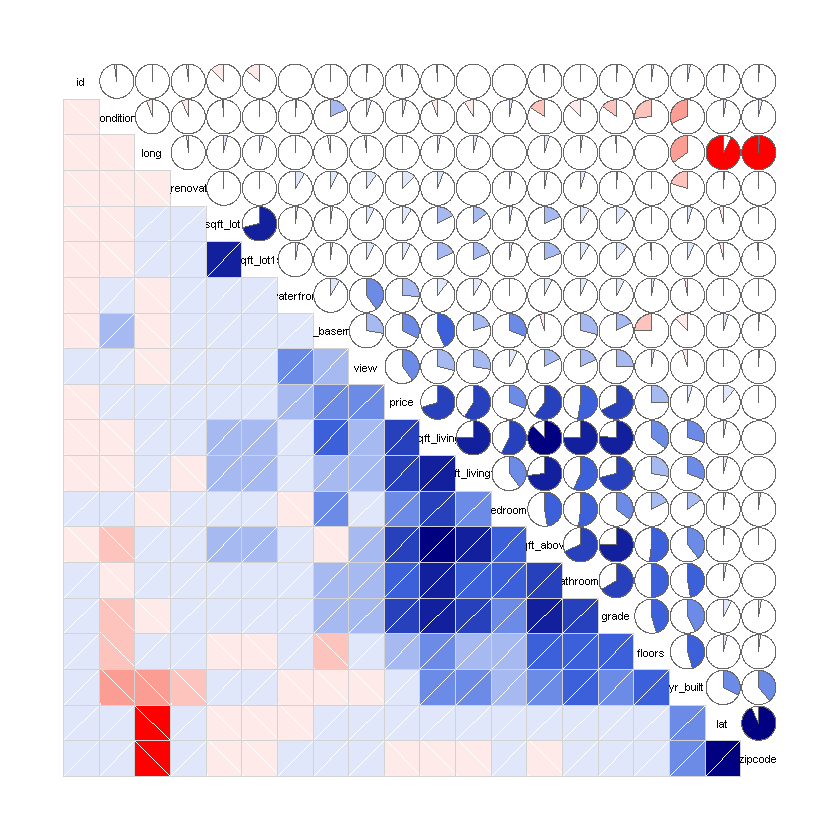

In [16]:
corrgram(house,order = TRUE,lower.panel = panel.shade, upper.panel = panel.pie,text.panel = panel.txt)

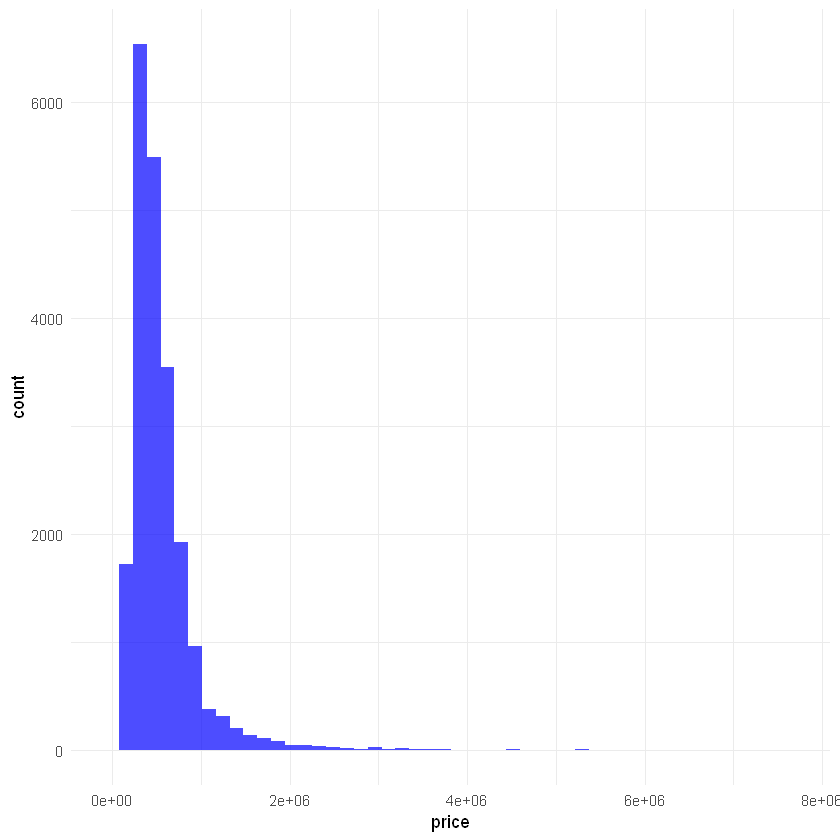

In [20]:
ggplot(house,aes(x=price)) + geom_histogram(bins=50,alpha=0.7,fill='blue')+theme_minimal()

In [22]:
#Building the model
library(caTools)

In [23]:
sample=sample.split(house$price, SplitRatio = 0.70)

In [24]:
train=subset(house,sample==TRUE)#training data
test=subset(house,sample==FALSE)#testing data

In [44]:
#training our model
model=lm(price ~ sqft_living+ grade+sqft_above,train)# .means taking all columns but in slr u hav to mention the column names
summary(model)


Call:
lm(formula = price ~ sqft_living + grade + sqft_above, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1178911  -140805   -24504   100322  4656125 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.657e+05  1.642e+04  -40.55   <2e-16 ***
sqft_living  2.451e+02  4.923e+00   49.79   <2e-16 ***
grade        1.093e+05  2.813e+03   38.84   <2e-16 ***
sqft_above  -7.695e+01  5.391e+00  -14.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 258400 on 15715 degrees of freedom
Multiple R-squared:  0.5469,	Adjusted R-squared:  0.5468 
F-statistic:  6324 on 3 and 15715 DF,  p-value: < 2.2e-16


<h3> INTERPRETATION • Here price is the dependent variable we want to predict • Here, we have the intercept and coefficients for value (Estimate) • Residuals is difference between observed and predicted value of dependent variable • Higher the number of *’s indicates higher the significance level(It’s based on p-value. Lesser the p-value, more the stars) • Here TV has high significance level • p-value is the probability of a variable being not relevant • t value shows how many S.D’s the Coefficient is away from Zero

In [45]:
#visualize our model
#grab residuals (errors)
res=residuals(model)

In [46]:
#convert to data frame for ggplot
res=as.data.frame(res)
head(res)

,res
1,-75737.48
3,60581.44
4,105158.21
5,19007.38
6,-340514.02
7,-130113.92


In [47]:
#histogram of residuals
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


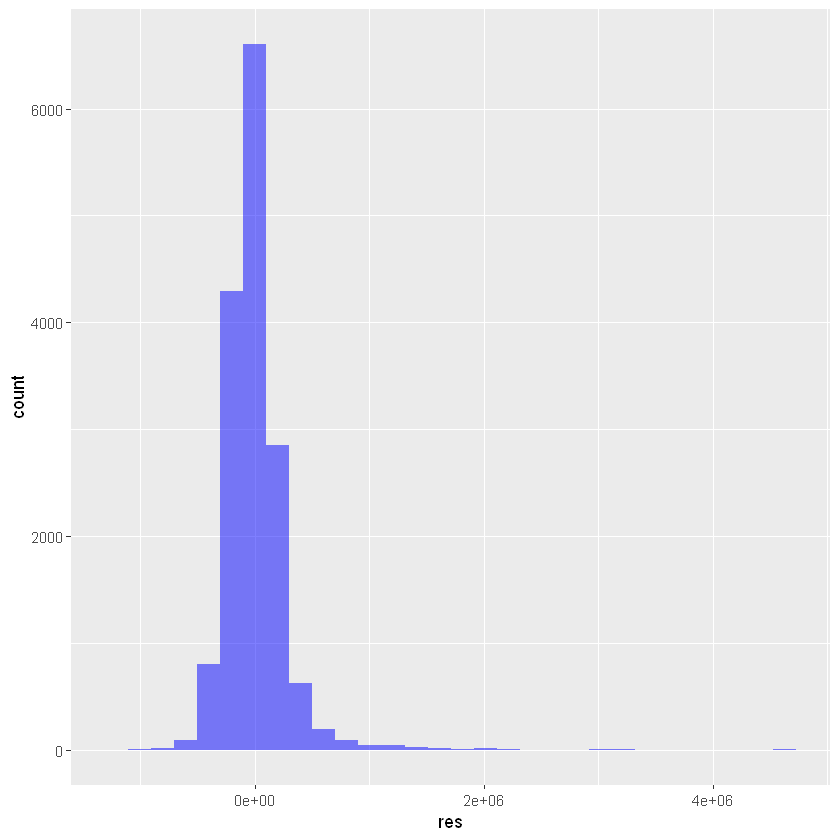

In [48]:
ggplot(res,aes(res))+geom_histogram(fill='blue',alpha=0.5)

<h2> Plotting Residuals to check whether its Normal Distribution

In [49]:
#prediction
price.predictions=predict(model,test)

In [50]:
results=cbind(price.predictions,test$price)
colnames(results)=c("pred","real")
results=as.data.frame(results)
results

,pred,real
2,562187.7,538000
9,454718.5,229500
11,937985.0,662500
18,368273.2,485000
19,301001.1,189000
20,309410.1,230000
22,886068.0,2000000
23,590219.0,285000
25,620491.4,329000
29,410991.6,438000


In [51]:
#to eliminate the negative values
to_zero=function(x){
  if (x<0){
    return(0)
  }else{
    return(x)
  }
}

In [52]:
results$pred=sapply(results$pred,to_zero)
print(results)

             pred    real
2      562187.703  538000
9      454718.501  229500
11     937985.042  662500
18     368273.191  485000
19     301001.083  189000
20     309410.097  230000
22     886067.971 2000000
23     590218.981  285000
25     620491.430  329000
29     410991.631  438000
34     391766.262  535000
40     649082.076  605000
42    1042828.090  775000
50     825961.146 1350000
60     519583.268  430000
61     613128.859  650000
64     467447.384  549000
65     420686.026  425000
70     869745.232 1325000
73     600155.064  571000
78     274092.240  480000
82     418727.272  360000
83     516627.521  355000
84     490992.622  356000
87     546544.278  305000
95     496489.841  700000
96     724203.354  905000
99     449760.523  314000
100    707893.003  437500
103    576764.560  699950
104    699536.157 1088000
112    244918.400  570000
114    525948.846  329950
117    475856.397  518500
123    119418.558  395000
125    807119.363  770000
126    730196.337 1450000
127    59856

In [53]:
# there are lot of evaluate the predicte values
mse=mean((results$real-results$pred)^2)
print(mse)

[1] 49244036730


In [54]:
#rmsc
mse^0.5

[1] 221910

In [55]:
SSE=sum((results$pred-results$real)^2)
SSE

[1] 2.902936e+14

In [58]:
SST=sum((540088-results$real)^2)
SST

[1] 5.95764e+14

In [59]:
R2=1-SSE/SST
R2

[1] 0.5127372

<h3>R-squared is a goodness-of-fit measure for linear regression models. 
• R-squared measures the strength of the relationship between your model and the dependent variable on a convenient
0 – 100% scale. 
• this model can explain more 51% of the variation.

<h1>SIMPLE LINEAR REGRESSION

In [61]:
model=lm(price ~ sqft_living,train)# .means taking all columns but in slr u hav to mention the column names
summary(model)


Call:
lm(formula = price ~ sqft_living, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1601513  -151228   -23767   109546  4252482 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -62306.430   5289.861  -11.78   <2e-16 ***
sqft_living    291.272      2.309  126.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 270600 on 15717 degrees of freedom
Multiple R-squared:  0.5031,	Adjusted R-squared:  0.503 
F-statistic: 1.591e+04 on 1 and 15717 DF,  p-value: < 2.2e-16


<h3> INTERPRETATION • Here price is the dependent variable we want to predict and sqft_living has highest corelation and we are using it for simple linear regression• Here, we have the intercept and coefficients for value (Estimate) • Residuals is difference between observed and predicted value of dependent variable • Higher the number of *’s indicates higher the significance level(It’s based on p-value. Lesser the p-value, more the stars)  • p-value is the probability of a variable being not relevant • t value shows how many S.D’s the Coefficient is away from Zero

In [62]:
#visualize our model
#grab residuals (errors)
res=residuals(model)

In [63]:
#convert to data frame for ggplot
res=as.data.frame(res)
head(res)

,res
1,-59494.21
3,18027.20
4,95413.84
5,82969.93
6,-291386.34
7,-179724.58


In [64]:
#histogram of residuals
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


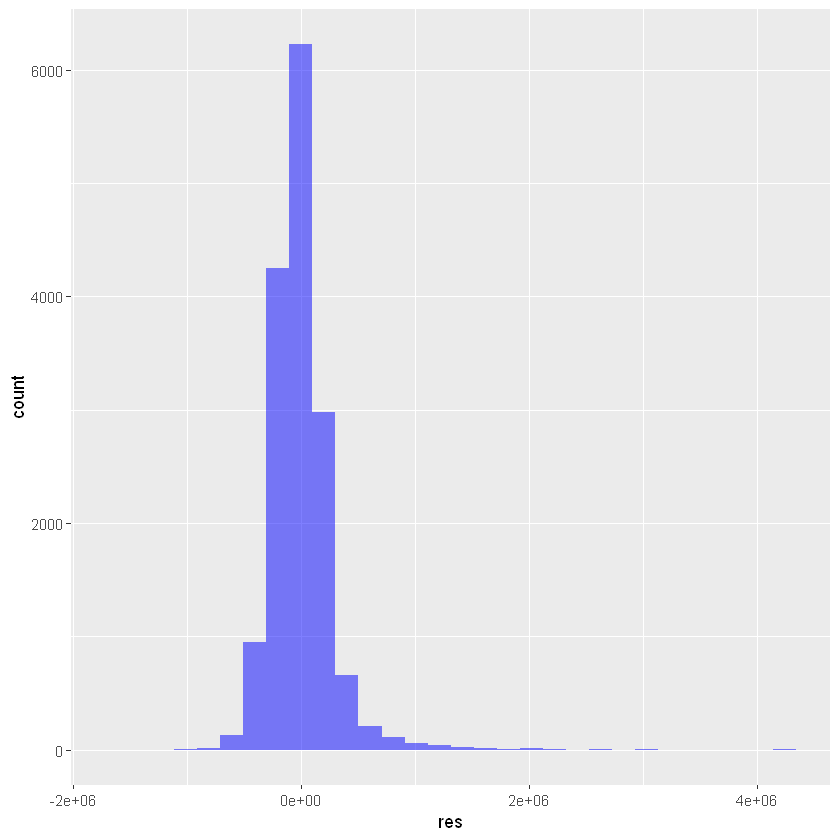

In [65]:
ggplot(res,aes(res))+geom_histogram(fill='blue',alpha=0.5)

<h2> Plotting Residuals to check whether its Normal Distribution

In [66]:
#prediction
price.predictions=predict(model,test)

In [67]:
results=cbind(price.predictions,test$price)
colnames(results)=c("pred","real")
results=as.data.frame(results)
results

,pred,real
2,686261.9,538000
9,456157.2,229500
11,974620.9,662500
18,403728.3,485000
19,287219.6,189000
20,301783.2,230000
22,826072.3,2000000
23,598880.4,285000
25,651309.3,329000
29,380426.6,438000


In [68]:
#to eliminate the negative values
to_zero=function(x){
  if (x<0){
    return(0)
  }else{
    return(x)
  }
}

In [69]:
results$pred=sapply(results$pred,to_zero)
print(results)

            pred    real
2      686261.91  538000
9      456157.25  229500
11     974620.92  662500
18     403728.34  485000
19     287219.64  189000
20     301783.23  230000
22     826072.34 2000000
23     598880.39  285000
25     651309.31  329000
29     380426.60  438000
34     255179.75  535000
40     700825.50  605000
42    1166860.26  775000
50     739564.64 1350000
60     476546.27  430000
61     563927.79  650000
64     386252.03  549000
65     421204.64  425000
70     869763.10 1325000
73     738690.82  571000
78     240616.17  480000
82     491109.85  360000
83     526062.46  355000
84     427030.07  356000
87     712476.37  305000
95     397902.90  700000
96     898890.27  905000
99     464895.40  314000
100    613443.98  437500
103    575578.66  699950
104    788207.02 1088000
112    304695.95  570000
114    543538.77  329950
117    400815.62  518500
123    161972.80  395000
125    785294.30  770000
126    738690.82 1450000
127    549364.20  445000
132    523149.74  660500


In [70]:
#rmsc
mse^0.5

[1] 221910

In [71]:
SSE=sum((results$pred-results$real)^2)
SSE

[1] 3.288333e+14

In [72]:
SST=sum((540088-results$real)^2)
SST

[1] 5.95764e+14

In [73]:
R2=1-SSE/SST
R2

[1] 0.4480476

<h3>R-squared is a goodness-of-fit measure for linear regression models. 
• R-squared measures the strength of the relationship between your model and the dependent variable on a convenient
0 – 100% scale. 
• this model can explain more 44% of the variation.